# Customer Segmentation

Customer segmentation is basically finding key factors that can be used to divide customers into groups that can be targeted for marketing. This entails use of features such as <b>age, gender, income, work, work experience and spending habbits</b> to create different groups.

The goal of segmenting customers is to know how they are related and their value in the business. This therefore helps companies in sending special offers to their valued customers and encourage them to buy products or make some kind of business with them.

Customer segmentation is also useful in improvement of customer service and customer retention.

In this project, a machine learning model is created that segments customers based on certain features that can help businesses improve their marketing activities by targeting the right groups of their customers for certain offers, retaining them and attracting more.

This model is trained on an <b> Unsupervised Clustering Algorithm (KMeans Clustering)</b> to divide and group customers into similar groups. 

<b> Data </b>

The dataset used in this project contains the following features.

. CustomerID

. Age

. Gender

. Annual Income ($)

. Profession

. Work experience

. Family size

. Spending Score (1-100)

The above features are analyzed and the most useful ones are used for clustering.

In [44]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.cluster import KMeans

In [45]:
# load the dataset
dataset = pd.read_csv("Customers.csv")
df = pd.DataFrame(dataset)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
0,1,Male,19,15000,Healthcare,1,4,39
1,2,Male,21,35000,Engineer,3,3,81
2,3,Female,20,86000,Engineer,1,1,6
3,4,Female,23,59000,Lawyer,0,2,77
4,5,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,Artist,8,7,40
1996,1997,Female,91,73158,Doctor,7,7,32
1997,1998,Male,87,90961,Healthcare,9,2,14
1998,1999,Male,77,182109,Executive,7,2,4


## Exploratory Data Analysis 

In [46]:
# check the shapes of the rows and columns and the dataset's head values
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1], "\n")
print("Subset of the dataset: \n", df.head(), "\n")

Rows:  2000
Columns:  8 

Subset of the dataset: 
    CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  Spending Score (1-100)  
0            4                      39  
1            3                      81  
2            1                       6  
3            2                      77  
4            6                      40   



In [47]:
# sort values based on Annual Income
df.sort_values("Annual Income ($)", inplace=True)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
169,170,Male,32,0,Artist,2,2,63
246,247,Male,23,0,Doctor,1,3,96
272,273,Female,96,1000,Entertainment,0,3,76
113,114,Male,19,2000,Artist,1,1,46
96,97,Female,47,2000,Artist,0,1,47
...,...,...,...,...,...,...,...,...
638,639,Female,59,189672,Doctor,0,7,8
1576,1577,Female,16,189689,Healthcare,8,5,37
1825,1826,Male,7,189709,Artist,6,6,18
1257,1258,Male,60,189945,Engineer,0,5,20


In [48]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Profession                object
Work Experience            int64
Family Size                int64
Spending Score (1-100)     int64
dtype: object

In [49]:
# dataset's stats information
df.describe()

,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,4.102500,3.768500,50.962500
std,577.494589,28.429747,45739.536688,3.922204,1.970749,27.934661
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,500.750000,25.000000,74572.000000,1.000000,2.000000,28.000000
50%,1000.500000,48.000000,110045.000000,3.000000,4.000000,50.000000
75%,1500.250000,73.000000,149092.750000,7.000000,5.000000,75.000000
max,2000.000000,99.000000,189974.000000,17.000000,9.000000,100.000000


In [50]:
# dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 169 to 569
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
 7   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 140.6+ KB


In [51]:
# check for any null values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Profession                35
Work Experience            0
Family Size                0
Spending Score (1-100)     0
dtype: int64

In [52]:
# from the above analysis, I can see some missing values from Profession column
# check for the individual Profession's value count
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [53]:
# filter out a subset where "Profession" is NaN
df[df["Profession"].isna()]

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
237,238,Male,95,36000,NaN,0,4,35
1788,1789,Female,58,51416,NaN,7,5,46
440,441,Female,0,57373,NaN,0,7,29
1932,1933,Female,23,59905,NaN,7,5,79
1009,1010,Male,69,61637,NaN,0,5,67
219,220,Female,59,76000,NaN,9,1,61
1067,1068,Female,30,78821,NaN,1,4,46
927,928,Male,25,81367,NaN,0,3,87
118,119,Female,51,84000,NaN,2,7,43
1334,1335,Male,42,94844,NaN,7,6,64


## Saving Figures as png Images
Below is an extra code that will save plot figures as png image files

In [54]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [55]:
# check for duplicates
print(df.duplicated().any())
duplicated_data = df.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

False
Number of duplicated data:  0


In [56]:
# drop the customer ID column, it does not seem to be that relevant
df.drop(["CustomerID"], axis=1, inplace=True)
df

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
169,Male,32,0,Artist,2,2,63
246,Male,23,0,Doctor,1,3,96
272,Female,96,1000,Entertainment,0,3,76
113,Male,19,2000,Artist,1,1,46
96,Female,47,2000,Artist,0,1,47
...,...,...,...,...,...,...,...
638,Female,59,189672,Doctor,0,7,8
1576,Female,16,189689,Healthcare,8,5,37
1825,Male,7,189709,Artist,6,6,18
1257,Male,60,189945,Engineer,0,5,20


#### Data Visualization

C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ojare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

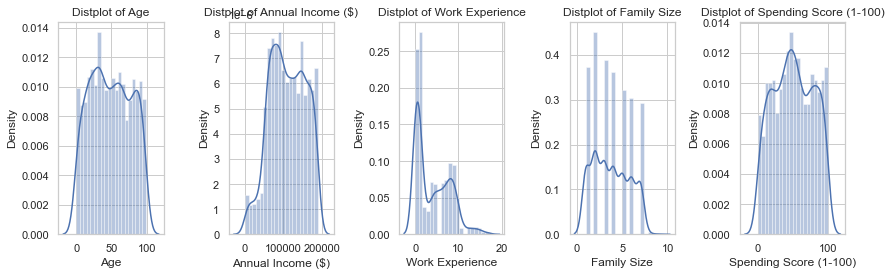

In [57]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ["Age", "Annual Income ($)", "Work Experience", "Family Size", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
save_fig("distplot")
plt.show()

The above analysis indicates that the age group between 20 and 50 do alot of shopping. Those with annual income of between 50000 and 150000 also spend alot in shopping.

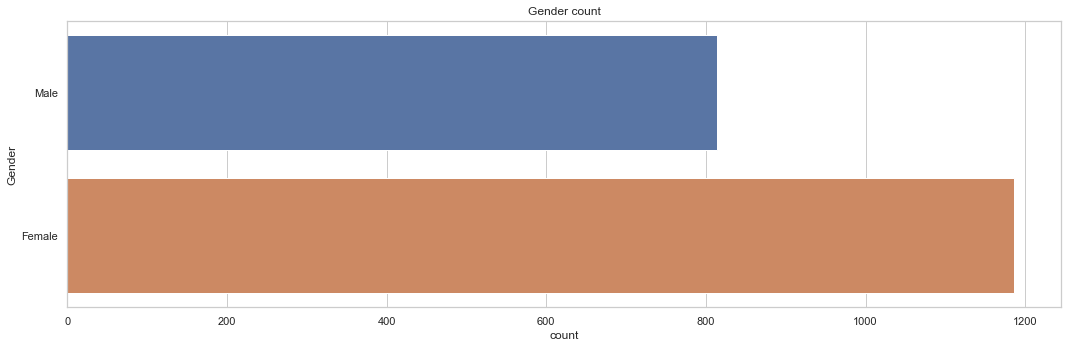

In [58]:
# gender that do alot of shopping
plt.figure(figsize=(15,5))
sns.countplot(y="Gender", data = df)
plt.title("Gender count")
save_fig("gender-count")

Clearly the female gender shop more than the male gender

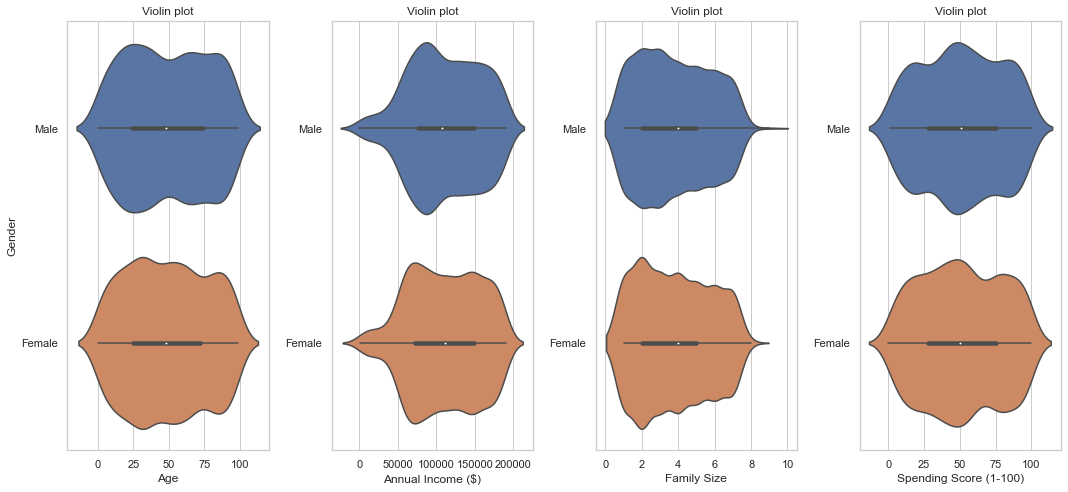

In [59]:
# violin plot for Age, Annual Income and Spending Score
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', "Annual Income ($)", "Family Size", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1,4,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x = cols, y = "Gender", data = df)
    plt.ylabel("Gender" if n == 1 else '')
    plt.title("Violin plot")
save_fig("violin-plot")
plt.show()

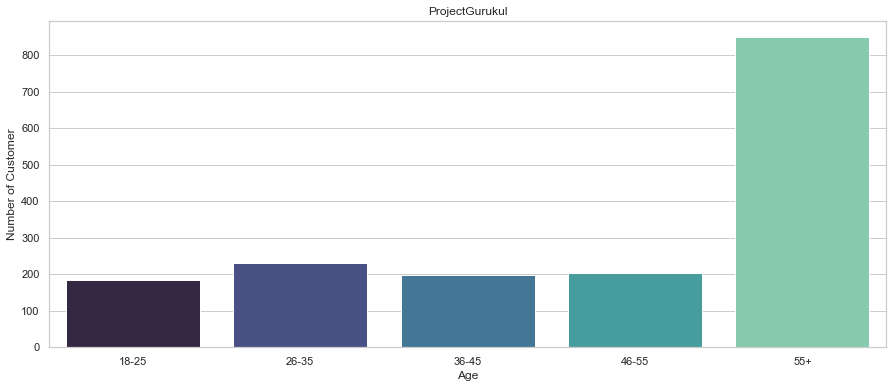

In [71]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.title('ProjectGurukul')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

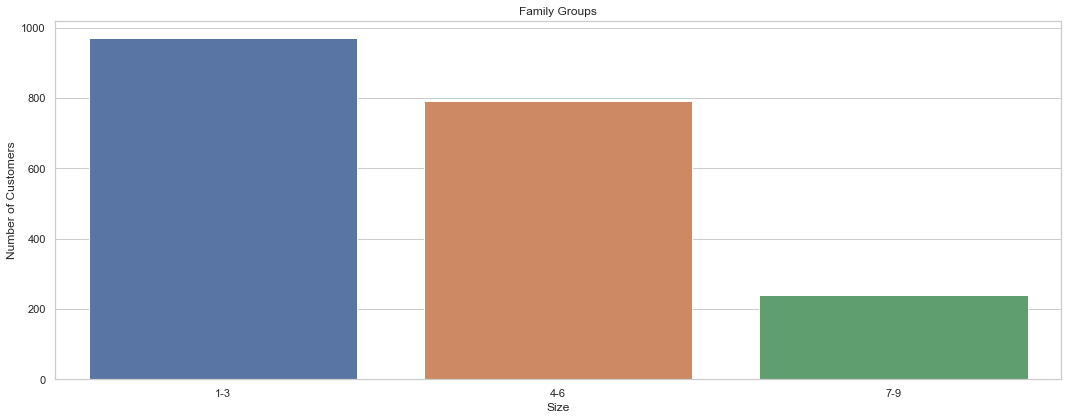

In [61]:
# Groups based on Family Size
fs_1_3 = df["Family Size"][(df["Family Size"] >=1) & (df["Family Size"] <=3)]
fs_4_6 = df["Family Size"][(df["Family Size"] >=4) & (df["Family Size"] <=6)]
fs_7_9 = df["Family Size"][(df["Family Size"] >=7) & (df["Family Size"] <=9)]

fsx = ["1-3", "4-6", "7-9"]
fsy = [len(fs_1_3.values), len(fs_4_6.values), len(fs_7_9.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = fsx, y = fsy, palette="deep")
plt.title("Family Groups")
plt.xlabel("Size")
plt.ylabel("Number of Customers")
save_fig("family-groups")
plt.show()

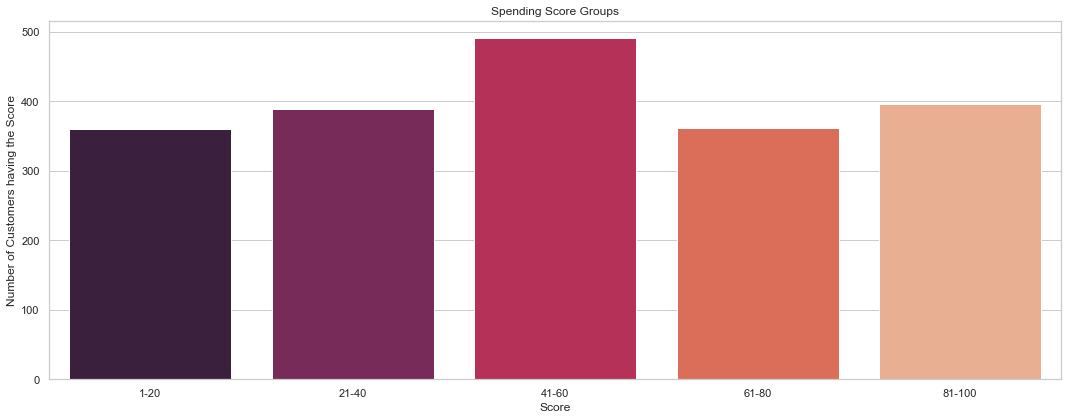

In [62]:
# let's also create groups based on Spending score
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='rocket')
plt.title("Spending Score Groups")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the Score")
save_fig("spending-score-groups")
plt.show()

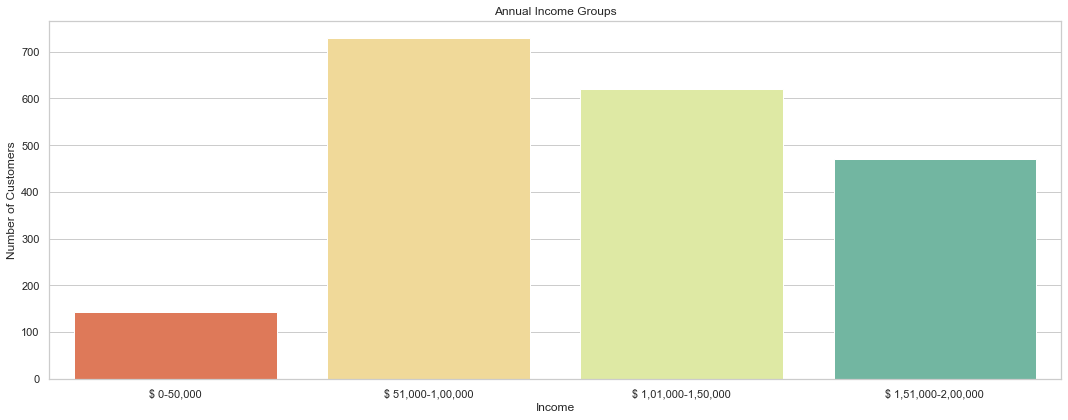

In [63]:
# Let's also create groups based on Annual Income
ann_0_50 = df["Annual Income ($)"][(df["Annual Income ($)"] >=0) & (df["Annual Income ($)"] <=50000)]
ann_51_100 = df["Annual Income ($)"][(df["Annual Income ($)"] >=51000) & (df["Annual Income ($)"] <=100000)]
ann_101_150 = df["Annual Income ($)"][(df["Annual Income ($)"] >=101000) & (df["Annual Income ($)"] <=150000)]
ann_151_200 = df["Annual Income ($)"][(df["Annual Income ($)"] >=151000) & (df["Annual Income ($)"] <=200000)]

annx = ["$ 0-50,000", "$ 51,000-1,00,000", "$ 1,01,000-1,50,000", "$ 1,51,000-2,00,000"]
anny = [len(ann_0_50.values), len(ann_51_100.values), len(ann_101_150.values), len(ann_151_200.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette="Spectral")
plt.title("Annual Income Groups")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
save_fig("annual-income-groups")
plt.show()

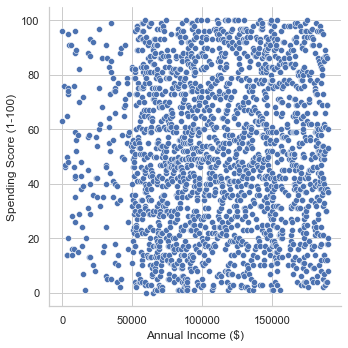

In [64]:
# create a relation between Annual Income and Spending Score
sns.relplot(x = "Annual Income ($)", y = "Spending Score (1-100)", data = df)
save_fig("income-spending-relation")

## Creating Clusters

This step entails creating clusters for different columns of the dataset, perform K-means clustering and visualize it

. First, create a cluster for Age and Spending Score

C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\clust

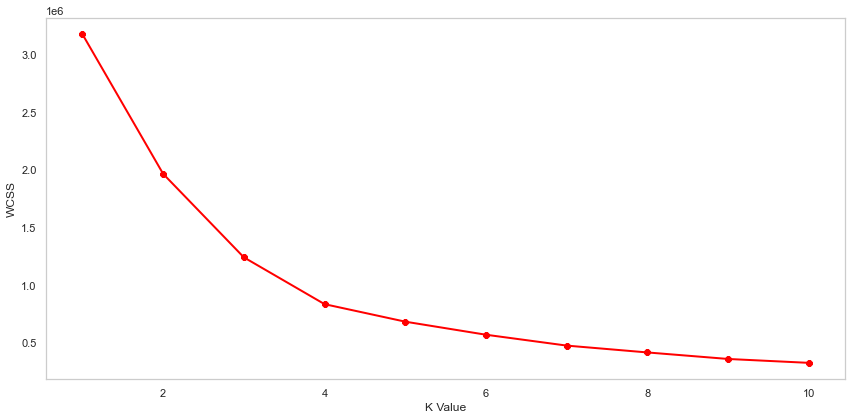

In [70]:
# Creating Clusters based on Age and Spending Score:
X1 = df.loc[:,['Age','Spending Score (1-100)']].values

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
save_fig("age-spending-score-clusters")
plt.show()

In [78]:
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(X1)
print(label)

C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 1 0 0]


In [79]:
print(kmeans.cluster_centers_)

[[74.58768267 49.64509395]
 [25.39827255 52.17370441]]


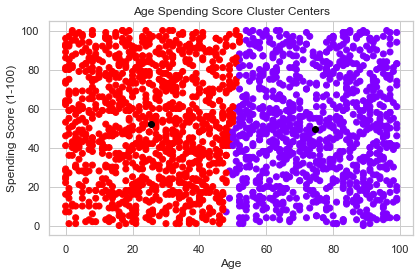

In [80]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age Spending Score Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
save_fig("age-spending-score-cluster-plot")
plt.show()

Perform similar operations on other columns, i.e, with Annual Income

C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ojare\anaconda3\lib\site-packages\sklearn\clust

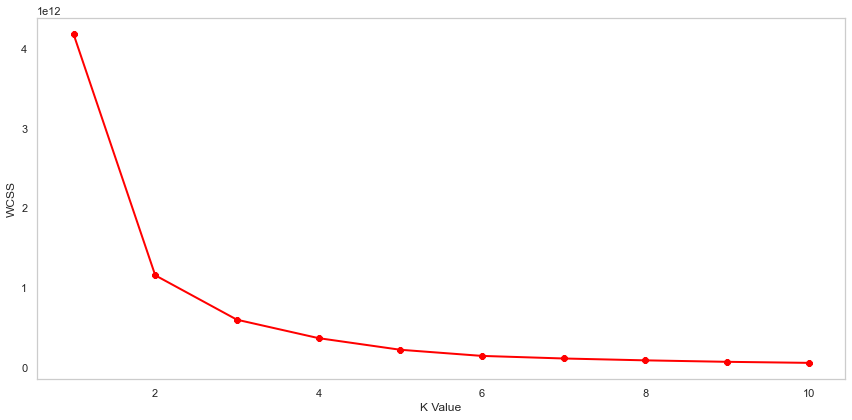

In [83]:
# Creating clusters based on Annual Income and Spending Score
X2 = df.loc[:,['Annual Income ($)', "Spending Score (1-100)"]].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    
# snippsnipp
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker= '8')
plt.xlabel("K Value")
plt.ylabel("WCSS")
save_fig('annual-income-spending-score-clusters')
plt.show()

In [93]:
# Fit the above clusters into KMeans algorithms predict labels, and also find centroids
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X2)

print(labels)

C:\Users\ojare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 4 4 ... 2 2 2]


In [94]:
print(kmeans.cluster_centers_)

[[1.37626128e+05 5.22847966e+01]
 [6.58301212e+04 4.95737374e+01]
 [1.73022524e+05 5.10985577e+01]
 [9.97504212e+04 5.13612774e+01]
 [2.19338843e+04 4.94214876e+01]]


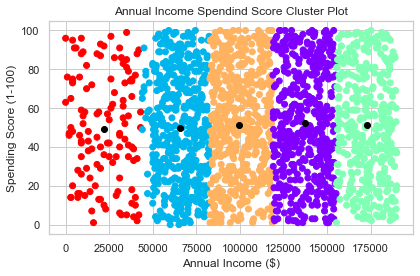

In [95]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Annual Income Spendind Score Cluster Plot")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
save_fig("annual-income-spending-score-cluster-plot")
plt.show()